<a href="https://colab.research.google.com/github/iamaqilnaim-cmd/Data-Science-Project/blob/main/PROJECT_2_P166244_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
import pandas as pd

import io

uploaded = files.upload()


Saving cars_2025 (1).csv to cars_2025 (1) (2).csv


In [7]:
filename = list(uploaded.keys())[0]

In [8]:
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [9]:
print(f"Successfully loaded: {filename}")
df.head()

Successfully loaded: cars_2025 (1) (2).csv


,date_reg,type,maker,model,colour,fuel,state
0,2025-01-01,motokar,BYD,Seal,white,electric,Rakan Niaga
1,2025-01-01,window_van,Cam,Placer-X,yellow,greendiesel,Johor
2,2025-01-01,jip,Chery,Jaecoo J7,green,petrol,Rakan Niaga
3,2025-01-01,jip,Chery,Jaecoo J7,silver,petrol,Rakan Niaga
4,2025-01-01,jip,Chery,Tiggo,grey,petrol,Rakan Niaga


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# Step 1: Remove whitespaces and standardize text formatting
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['maker'] = df['maker'].str.title()
df['state'] = df['state'].str.title()
df['fuel'] = df['fuel'].str.lower()

In [12]:
# Step 2: Date Conversion
df['date_reg'] = pd.to_datetime(df['date_reg'])

In [13]:
# Step 3: Deduplication (Essential: Original data has ~628,441 duplicates)
df = df.drop_duplicates()

In [14]:
# Step 4: Feature Engineering
# Categorize Energy Types for Problem II
green_fuels = ['electric', 'hybrid_petrol', 'hybrid_diesel']
df['energy_class'] = df['fuel'].apply(lambda x: 'Green Energy' if x in green_fuels else 'Traditional')

In [15]:
# Extract month for Seasonal Trends in Problem III
df['month_name'] = df['date_reg'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

/tmp/ipython-input-2286927784.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


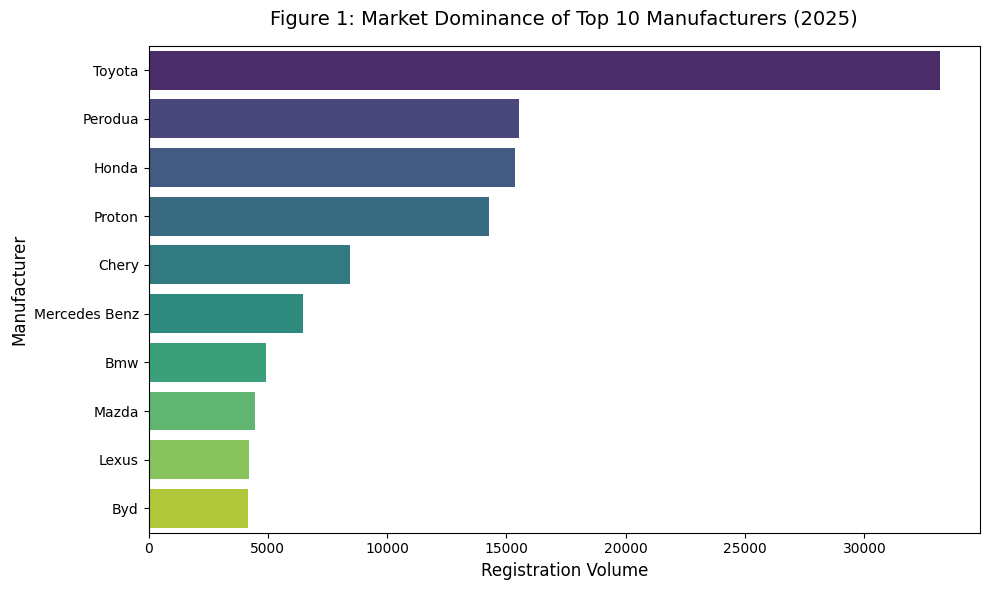

In [16]:
# ==========================================
# 2. VISUALIZATIONS
# ==========================================

# FIGURE 1: Market Dominance (Horizontal Bar Chart)
# Goal: To analyse registration volume of manufacturers.
plt.figure(figsize=(10, 6))
top_10 = df['maker'].value_counts().head(10)
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Figure 1: Market Dominance of Top 10 Manufacturers (2025)', fontsize=14, pad=15)
plt.xlabel('Registration Volume', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.tight_layout()
plt.savefig('fig1_market_dominance.png')

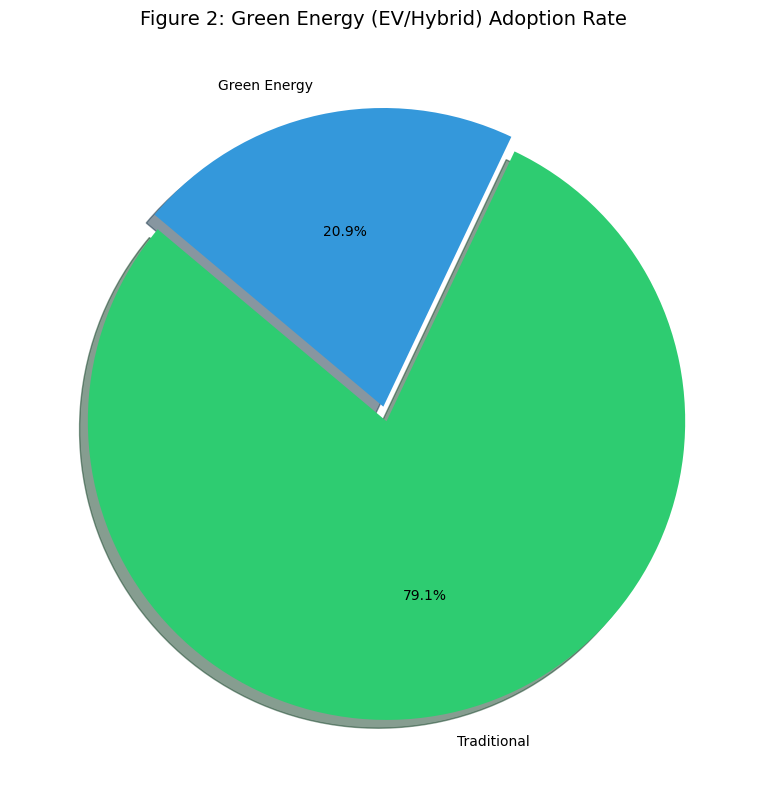

In [17]:
# FIGURE 2: Green Energy Adoption (Pie Chart)
# Goal: To assess adoption rate of green energy vs traditional engines.
plt.figure(figsize=(8, 8))
energy_dist = df['energy_class'].value_counts()
plt.pie(energy_dist, labels=energy_dist.index, autopct='%1.1f%%', startangle=140,
        colors=['#2ecc71', '#3498db'], explode=(0.05, 0), shadow=True)
plt.title('Figure 2: Green Energy (EV/Hybrid) Adoption Rate', fontsize=14)
plt.tight_layout()
plt.savefig('fig2_energy_adoption.png')

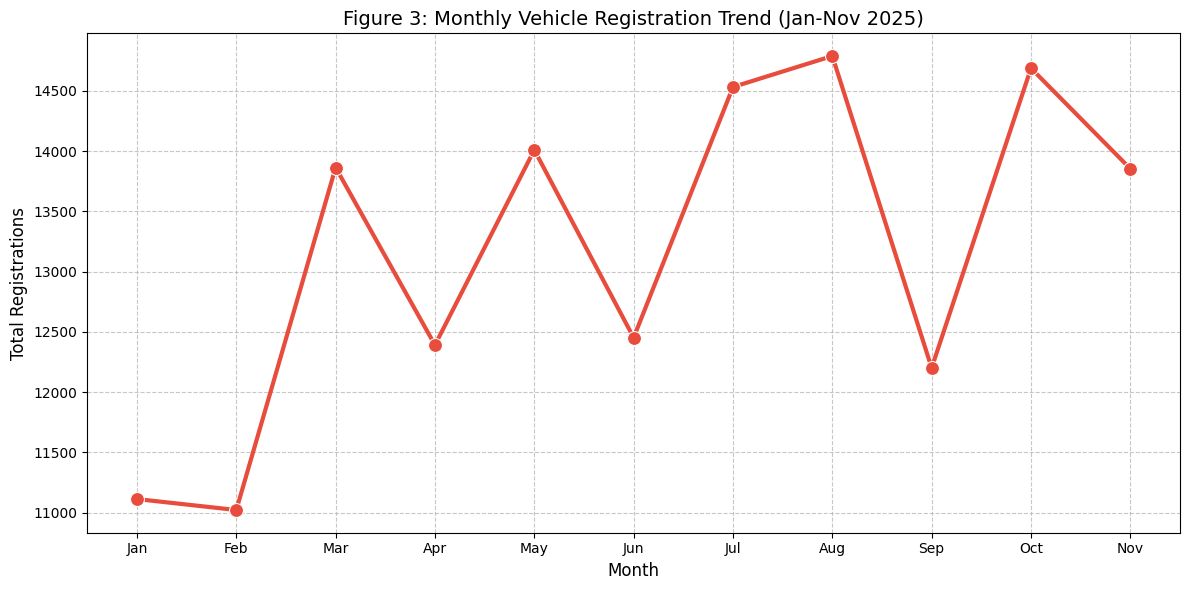

In [18]:
# FIGURE 3: Seasonal Trends (Line Plot)
# Goal: To identify seasonal trends for inventory optimization.
monthly_counts = df.groupby('month_name').size().reindex(month_order)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='#e74c3c', linewidth=3, markersize=10)
plt.title('Figure 3: Monthly Vehicle Registration Trend (Jan-Nov 2025)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Registrations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('fig3_seasonal_trends.png')

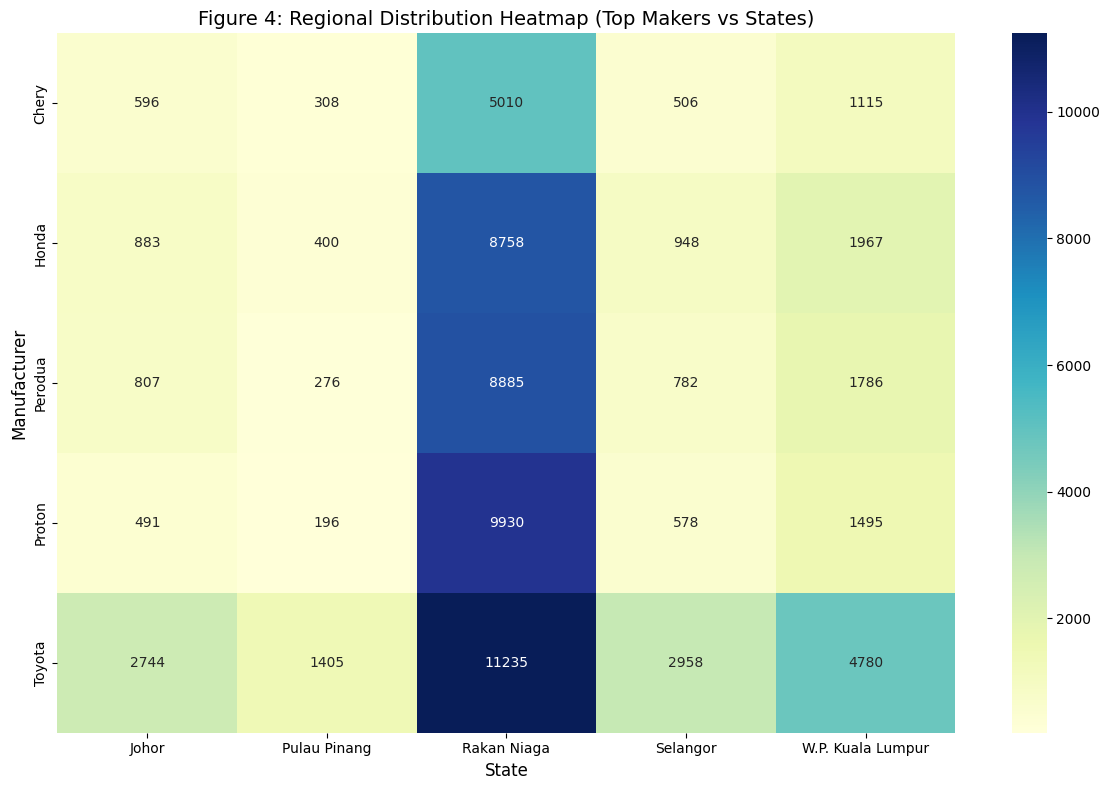

In [19]:
# FIGURE 4: Regional Analysis (Heatmap)
# Goal: To cross-analyze manufacturer presence with state-level demand.
top_5_makers = df['maker'].value_counts().head(5).index
top_5_states = df['state'].value_counts().head(5).index
subset = df[df['maker'].isin(top_5_makers) & df['state'].isin(top_5_states)]
heatmap_data = subset.groupby(['maker', 'state']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Figure 4: Regional Distribution Heatmap (Top Makers vs States)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.tight_layout()
plt.savefig('fig4_regional_heatmap.png')

/tmp/ipython-input-3428271205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month_name', y='daily_count', data=daily_vol, order=month_order, palette='Set3')


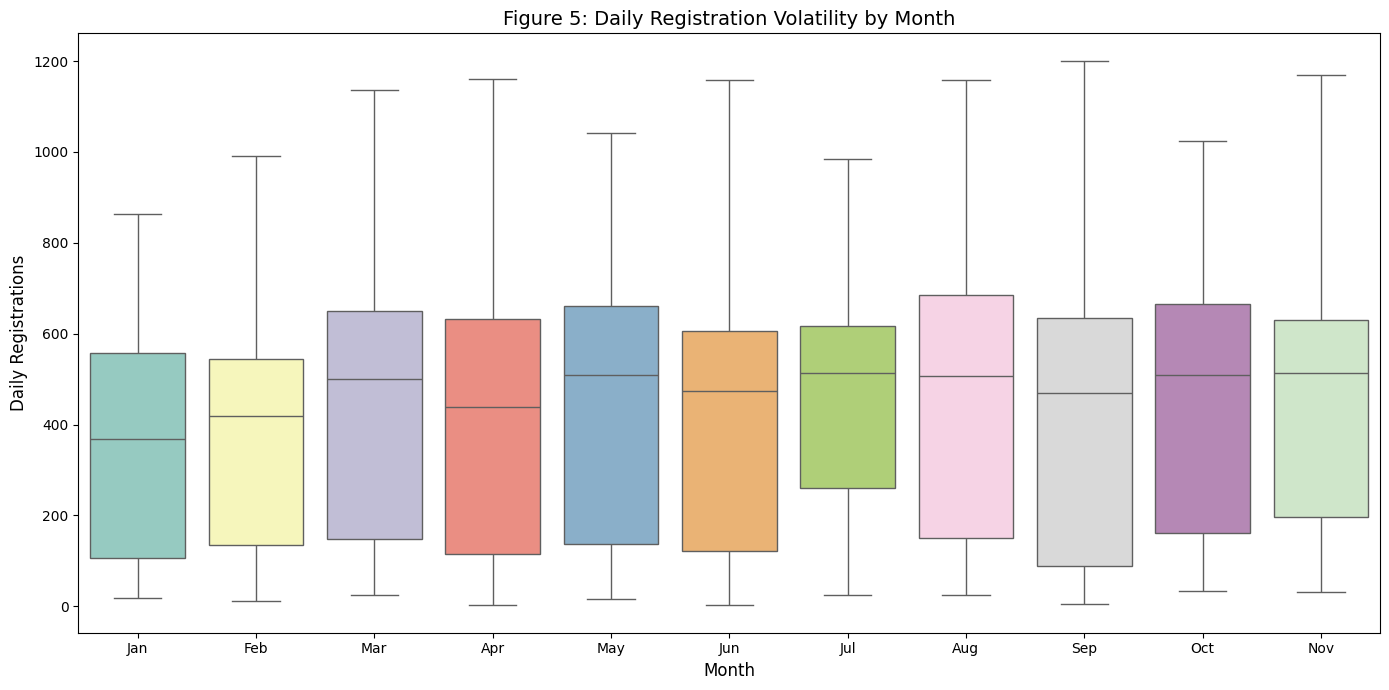

In [20]:
# FIGURE 5: Daily Volatility (Box Plot)
# Goal: To analyze registration consistency for marketing and inventory stability.
daily_vol = df.groupby(['date_reg', 'month_name']).size().reset_index(name='daily_count')
plt.figure(figsize=(14, 7))
sns.boxplot(x='month_name', y='daily_count', data=daily_vol, order=month_order, palette='Set3')
plt.title('Figure 5: Daily Registration Volatility by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Daily Registrations', fontsize=12)
plt.tight_layout()
plt.savefig('fig5_volatility_boxplot.png')